In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


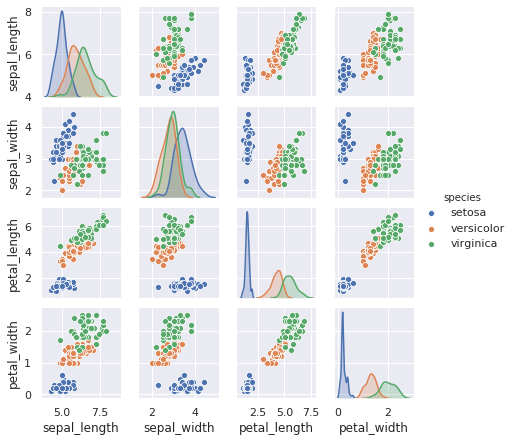

In [2]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', height=1.5)

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

## Использование API scikit-learn

- импорт соответствующего класса estimator из библиотеки
- выбор гиперпараметров, создание экземпляра класса
- компоновка данных в матрицу признаков и вектор целей (scikit-learn поддерживает numpy массивы и в некоторых случаях scypy разреженные матрицы. Массивы pandas придется перегнать в numpy)
- обучение методом fit()
- получение прдсказаний для обучения с учителем через метод predict()
- преобразование для обучения без учителя с методом transform() или предсказание (для кластеризации) методом predict()
- fit() и transform() использются так-же для препроцессинга данных

In [5]:
import matplotlib.pyplot as plt
import numpy as np

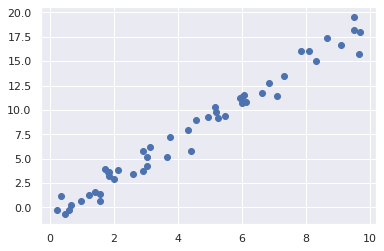

In [6]:
rnd = np.random.RandomState(42)
x = 10 * rnd.rand(50)
y = 2 * x - 1 + rnd.randn(50)
plt.scatter(x, y)

#### Выбор модели

In [7]:
from sklearn.linear_model import LinearRegression

#### Выбор гиперпараметров. Создание экземпляра estimator

подбор точки пересечения с осью координат

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Подготовка данных


In [9]:
x.shape

(50,)

In [10]:
y.shape

(50,)

In [11]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### Обучение

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.coef_

array([1.9776566])

In [14]:
model.intercept_

-0.9033107255311164

Это угловой коэфициент и точка пересечения с осью координат для нашей модели.

#### Получение предсказаний

создадим новые данные, которыек будем предсказывать

In [15]:
xfit = np.linspace(-1, 11) 

In [16]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

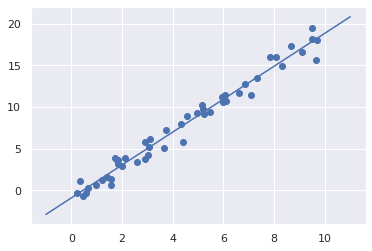

In [17]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

### Наивный баесовский классификатор для ириса (обучение с учителем)

Предположим, что все распределения в датасете взяты из выровненного по осям координат гаусова распределения. Разделим данные на трейн/тест.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [20]:
# модель
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [21]:
model.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
y_model = model.predict(Xtest)

In [23]:
# точность
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Обучение без учителя (понижение размерности)

Используем PCA для ириса (там 4 признака, снизим до двух измеренеий)

In [24]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

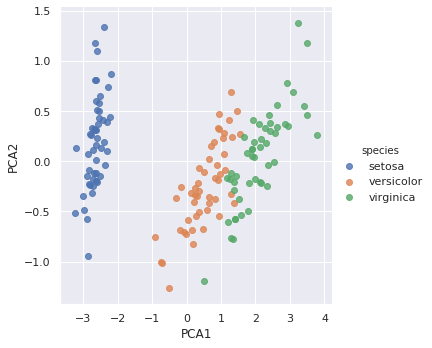

In [25]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False)

### Обучение без учителя (кластеризация)

Используем GMM (gausian mixture model)

In [26]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')

In [27]:
model.fit(X_iris)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [28]:
y_gmm = model.predict(X_iris)

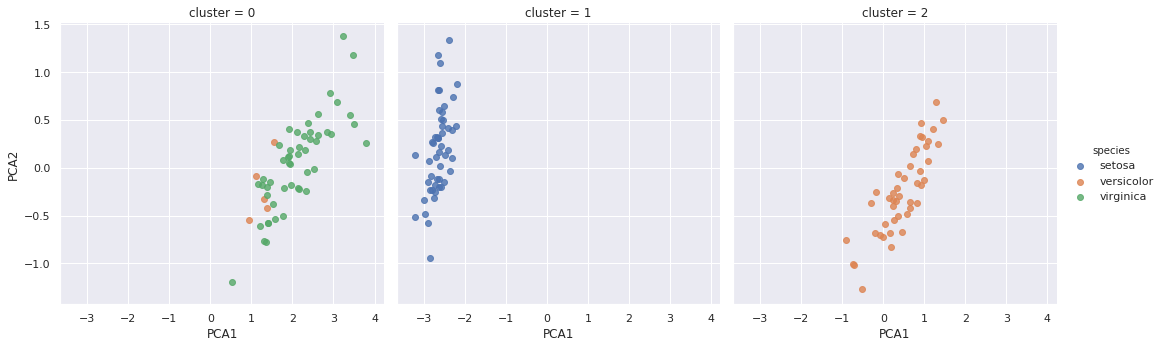

In [29]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, col='cluster', fit_reg=False)

### Анализ рукописных цифр

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

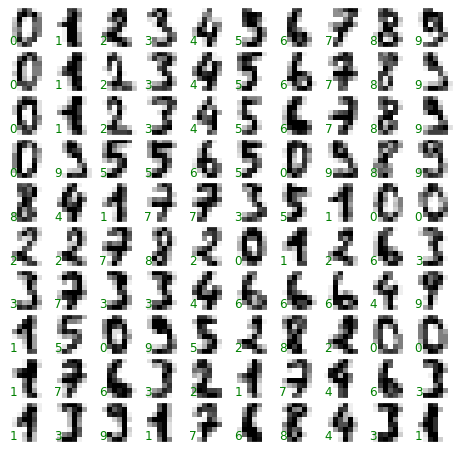

In [31]:
# визуализация первых 100 изображений
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',
             interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

Получим для изображения 8х8 вектор 64, где каждое значение - это пиксел в изображении. y - набор целей.

In [32]:
X = digits.data
X.shape

(1797, 64)

In [33]:
y = digits.target
y.shape

(1797,)

#### Понижение размерности

снизим 64-мерное пространство до двухмерного с помощью Isomap

In [34]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(X)
data_projected.shape

(1797, 2)

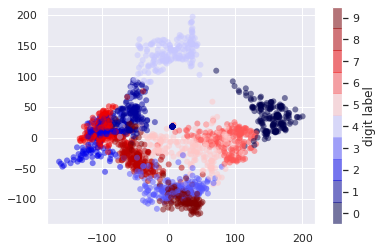

In [35]:
plt.scatter(data_projected[:, 0], data_projected[:, 1],
           c=y, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('seismic', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

#### классификация

используем туже наивную баесовскую модель, что и для ириса

In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [37]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [38]:
accuracy_score(ytest, y_model)

0.8333333333333334

Confusion matrix помогает понять где модель чаще всего ошибается

Text(89.18, 0.5, 'true')

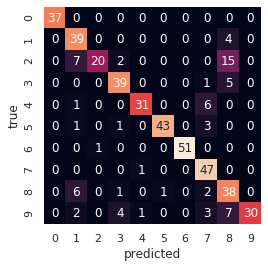

In [39]:
from sklearn.metrics import confusion_matrix
matr = confusion_matrix(ytest, y_model)
sns.heatmap(matr,square=True, annot=True, cbar=False)
plt.xlabel('predicted')
plt.ylabel('true')

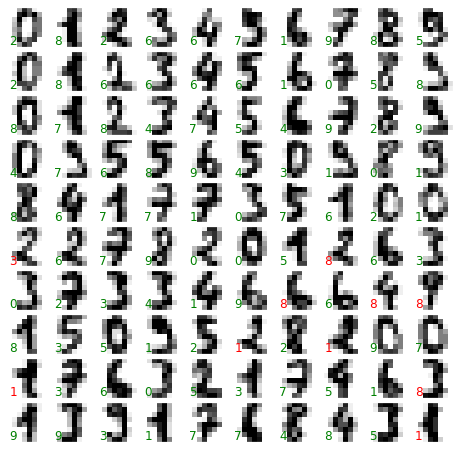

In [40]:
# можно вывести входные данные с предсказакныыми метками
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',
             interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

### Проверка модели (validation curve)

будем использовать простую линейную регрессию с полиномиальным препроцессингом в пайплайне

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [42]:
def pol_reg(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [43]:
# создадим данные
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rnd.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rnd.randn(N)
    
    return X, y

In [44]:
X, y = make_data(40)

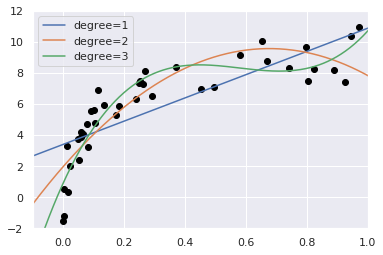

In [45]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 2, 3]:
    y_test = pol_reg(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

визуализируем кривую проверки с помощью validation_curve. Функция получает на вход модель, данные, назвение параметра и диапазон для анализа. Затем вычисляется значения для оценки эффективности модели.

In [46]:
from sklearn.model_selection import validation_curve


In [47]:
degree = np.arange(0, 21) # степень полинома
train_score, val_score = validation_curve(pol_reg(), X, y,
                                         'polynomialfeatures__degree',
                                         degree, cv=7)

Text(0, 0.5, 'score')

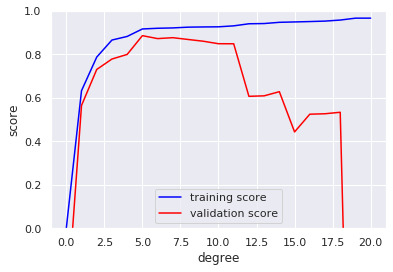

In [48]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')


(-0.05838122298392558,
 1.0299363727912818,
 -2.184926248883563,
 11.571603028864828)

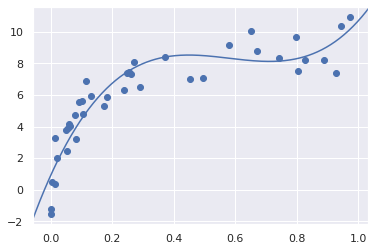

In [49]:
# оптимальный вариант - степень 5
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = pol_reg(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

Поведение кривых проверки зависят от двух факторов:

- сложности модели
- количества точек обучения

Бывает важно исследовать поаедения модели от количества точек обучения. Это можно реализовать за счет постепенно увеличивающегося подмножества данных обучения.

### кривые обучения (learning curve)

это график оценок обучения/проверки с учетом размера обучающей выборки. Должен вести себя так:

- переобучение на слишком маленьком наборе данных
- недообучение на слишком большом наборе
- на проверке всегда хуже, чем при обучении

Если достигнута точка, при которой данная конкретная модель сошлась, то добавление новых обучающих данных уже ничего не даст.

Text(0, 0.5, 'score')

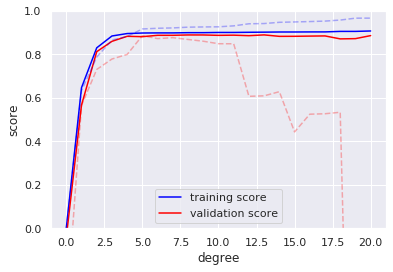

In [50]:
X2, y2 = make_data(200)
degree = np.arange(21)
train_score2, val_score2 = validation_curve(pol_reg(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

In [51]:
from sklearn.model_selection import learning_curve

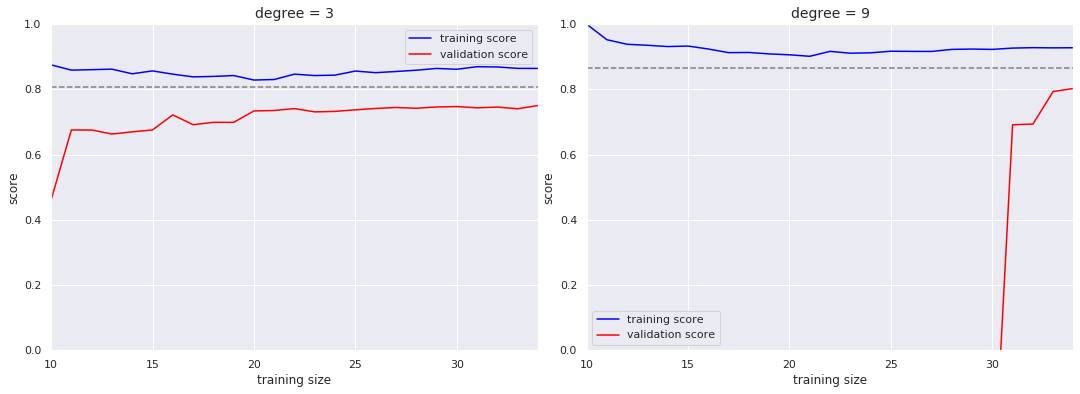

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([3, 9]):
    N, train_lc, val_lc = learning_curve(pol_reg(degree),
                                        X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

Добавление данных в простую модель не улучшает результат, т.к. модель быстро сошлась. Улучшить модель теперь можно только усложнив ее (т.е., в данном случае, увеличив степень). Однако бесконечно усложнаять модель не получится - переобучение.

### Гридсерч

Т.к. у модели обычно много параметров, построить кривые опроверки не представляется возможным. В этом случае лучше отыскать конкретную модель, для которой оценка эффективности достигала максимум.

In [53]:
from sklearn.model_selection import GridSearchCV
param_geid = {'polynomialfeatures__degree': np.arange(21),
             'linearregression__fit_intercept': [True, False],
             'linearregression__normalize': [True, False]}

In [54]:
grid = GridSearchCV(pol_reg(), param_geid, cv=7)

In [55]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearre

In [56]:
model = grid.best_estimator_

(-0.05838122298392558,
 1.0299363727912818,
 -2.184926248883563,
 11.571603028864828)

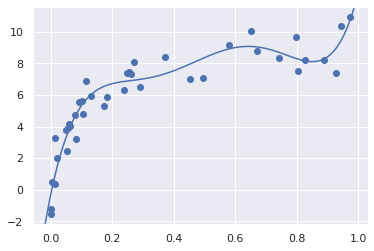

In [57]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

## Проектирование признаков

#### для one hot encoding

In [58]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [59]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [60]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

Чтобы не плодить громадные пустые матрицы, можно использорвать разреженную (не все прогнозаторы принимают)

In [61]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [62]:
# другие варианты
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher

#### векторизация текстов

In [63]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [66]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


В sklearn есчть реализация TF-IDF, когда слова получают вес с учетом частоты их появления в документе

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


#### обработка изображений

[scikit-image](https://scikit-image.org/)

#### заполнение пропусков

In [69]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [70]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

#### полиномиальные признаки

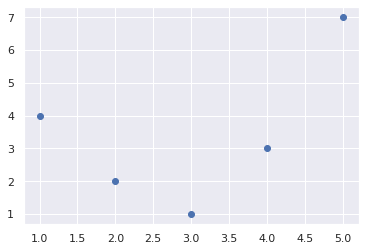

In [71]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)

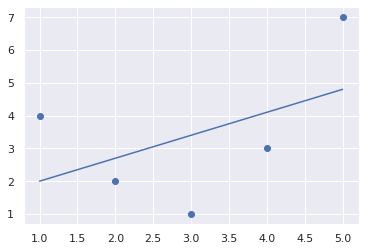

In [72]:
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

In [73]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


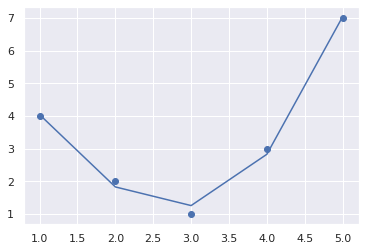

In [74]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

#### конвеер признаков


- добавить отсутствующие данные
- преобразовать признаки
- обучить модель

In [75]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                     PolynomialFeatures(degree=2),
                     LinearRegression())

In [76]:
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [77]:
model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


### пример с велосипедистами на бруклинском мосту

In [78]:
import pandas as pd
# данные по велосипедистам на фримонтском мосту
counts = pd.read_csv('pythonPDSH/notebooks/data/FremontBridge.csv', index_col='Date', parse_dates=True)
# данные по погоде
weather = pd.read_csv('pythonPDSH/notebooks/data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [79]:
counts.head(2)

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0


In [80]:
weather.head(2)

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999


In [81]:
# общий ежедневный поток велосипедиство в отдельном датафрейме
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [82]:
# проиндексируем поездки по дням
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [83]:
# проиндексируем выходные дни
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [84]:
# добавим расчеты по длительности светового дня
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


(8, 17)

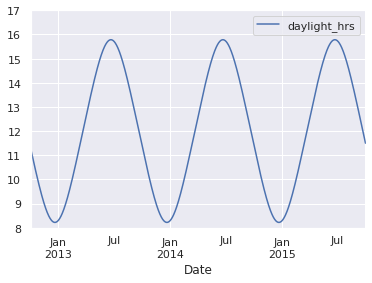

In [85]:
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [86]:
# добавим к данным среднюю температуру и общее количество осадков. Обозначим отдельным флагом сухие дни
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [87]:
# счетчик, считающий кол-во прошедших лет для отслеживания ежегодных измененеий кол-ва проезжающих
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [88]:
# итог
daily.head(5)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


Теперь осталось дропнуть строки с пустыми значениями и обучить лин.регрессию. fit_intercept=False, так как флаги дней определяют точки пересечения с осями координат

In [89]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

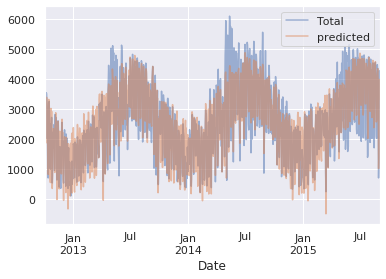

In [90]:
daily[['Total', 'predicted']].plot(alpha=0.5)

явно упущены ключевые признаки. Особенно летом. Однако грубая аппроксимация уже дает представление о трафике. Посмотрим коэфициэнты модели

In [91]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              501.529506
Tue              615.964486
Wed              589.391681
Thu              478.935936
Fri              174.454339
Sat            -1106.451896
Sun            -1136.789663
holiday        -1186.818446
daylight_hrs     128.918672
PRCP            -665.916842
dry day          543.024483
Temp (C)          65.260412
annual            29.793048
dtype: float64

Для интерпретации значений вычислим погрешност бустрапингом.

In [92]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [93]:
# теперь с учетом погрешностей
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Mon            502.0   86.0
Tue            616.0   83.0
Wed            589.0   83.0
Thu            479.0   85.0
Fri            174.0   81.0
Sat          -1106.0   80.0
Sun          -1137.0   83.0
holiday      -1187.0  163.0
daylight_hrs   129.0    9.0
PRCP          -666.0   62.0
dry day        543.0   33.0
Temp (C)        65.0    4.0
annual          30.0   18.0


1. по будням велосипедистов явно больше
2. с каждым дополнительным часом в светлое время суток велосипедистов становится больше на 129 +/- 9
3. рост температуры на 1 градус дает 65 +/- 4
4. сухой день 546 +/- 33
5. каждый дюйм осадков забирает 665 +/- 62

Каждый год ежедневное кол-во вырастает на 28 +/- 18

В модели не хватает нелинейных влияний:

- совместное влияние осадков и температуры
- различие между дождливым утром и дождливым полуднем

Крмое того, мы не учитываем корреляцию между днями (влияние дождливого дня на последующие и т.д.)

### пример с распознаванием лиц

набор данных Labeled Faces in the Wild (LFW)

In [94]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


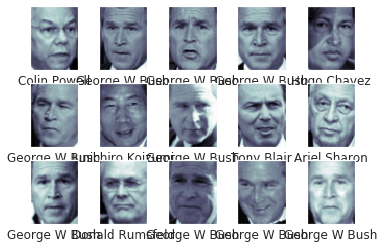

In [95]:
# несколько примеров
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

каждое изображение 62х47 (т.е. примерно 3000 пикселов). Что бы не рассматривать каждый пиксел как признак, используем метод главных компонент для извлечения 150 главных компонент

In [98]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [101]:
# трейн/тест
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [103]:
# используемпоиск по сетке, с подбором C (отступ) и gamma (размер ядра rbf)
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 1s, sys: 551 ms, total: 1min 2s
Wall time: 21.5 s
{'svc__C': 10, 'svc__gamma': 0.001}


Оптимальные параметры нашлись в середине сетки. если бы по краям, то надо было бы расширить сетку, чтобы убедиться, что найден истинный оптимум. 

Получим метки для контрольных данных

In [104]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

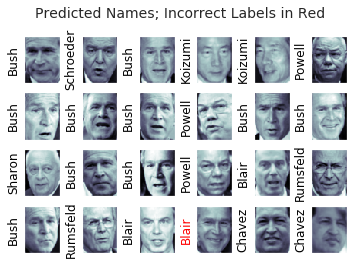

In [105]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [106]:
# выведем статистику
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(89.18, 0.5, 'predicted label')

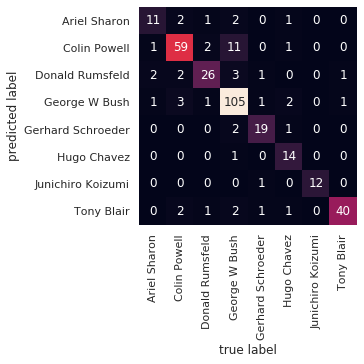

In [107]:
# матрица различий
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')